In [1]:
# NOTE - REMEMBER TO UPDATE THE CSV AND RINK IMAGE LINKS TO THE FILES UPLOADED TO GIT HUB

In [2]:
# Importing the necessary packages for this section

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib as plt
import matplotlib.image as mpimg
rink_img = mpimg.imread(r'C:\Users\zomgj\Downloads\hockey_rink.png') # this is an image background for shot charts

In [6]:
import seaborn as sns

In [7]:
import statsmodels.formula.api as smf
import math

In [8]:
import sklearn.ensemble as sken
import sklearn.linear_model as sklm
import sklearn.model_selection as skms
import patsy as ps

In [9]:
# Import the relevant dataset


In [10]:
shots_df = pd.read_csv(r'C:\Users\zomgj\Downloads\shots_2021.csv')

In [11]:
shots_df.head()

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
0,0,42.520583,61.0,61.0,-32.0,32.0,-8.4,0,0,0,...,61,0.202514,0.009192,0.445979,0.289830,0.023891,0.028594,0.718082,-32,-32
1,1,30.610456,-65.0,65.0,19.0,19.0,21.4,0,0,0,...,65,0.285948,0.031353,0.303080,0.325607,0.026384,0.027629,0.793188,19,-19
2,2,85.381497,-8.0,8.0,-27.0,27.0,3.8,0,0,0,...,8,0.161225,0.012753,0.307661,0.486296,0.019218,0.012846,0.840122,-27,27
3,3,29.274562,-60.0,60.0,-4.0,4.0,0.0,0,0,0,...,60,0.161623,0.121753,0.374061,0.264891,0.024508,0.053163,0.729294,-4,4
4,4,26.305893,63.0,63.0,4.0,4.0,0.0,0,0,0,...,63,0.116379,0.088392,0.432747,0.284554,0.018850,0.059078,0.695010,4,4


In [12]:
shots_df.set_index('shotID', inplace=True) # shotID is already a functionl index, so I will set it as such and drop the default index


In [13]:
# There is a vast amount of information here. For my purposes, I'm interested in ShotID Shot Distance, Shot x and Y Coordinates, Shot type, Shot outcome and the shooting player's position

shot_info = shots_df[['shotDistance', 'xCordAdjusted', 'yCordAdjusted','shotType', 'event', 'playerPositionThatDidEvent']]
shot_info.head()

,shotDistance,xCordAdjusted,yCordAdjusted,shotType,event,playerPositionThatDidEvent
shotID,,,,,,
0,42.520583,61,-32,WRIST,SHOT,C
1,30.610456,65,-19,WRIST,SHOT,L
2,85.381497,8,27,WRIST,SHOT,D
3,29.274562,60,4,WRIST,SHOT,L
4,26.305893,63,4,WRIST,SHOT,L


In [14]:
# These column names are not as clean or informative as they could be, so I will tidy them up.

shot_info_rename = shot_info.rename(columns={'event': 'Shot Outcome','playerPositionThatDidEvent': 'Shooter Position', 'xCordAdjusted': 'xCord', 'yCordAdjusted': 'yCord'})
shot_info_rename.head()

,shotDistance,xCord,yCord,shotType,Shot Outcome,Shooter Position
shotID,,,,,,
0,42.520583,61,-32,WRIST,SHOT,C
1,30.610456,65,-19,WRIST,SHOT,L
2,85.381497,8,27,WRIST,SHOT,D
3,29.274562,60,4,WRIST,SHOT,L
4,26.305893,63,4,WRIST,SHOT,L


In [15]:
# Cleaning the Data
# I will check the shot_info df for missing data. It is not expected to find significant missing data as this datset is highly curated by Moneypuck.com
# I will not check for duplicates as each shot recorded has already been assigned a unique ID. It is not expected that there is any duplication of shots, and many individual shotIDs might share the same information. Therefore, dropping duplicates would incorrectly reduce the dataset.

In [16]:
# checking for missing values
missing_values = shot_info_rename.isnull().sum()
missing_values.head()

shotDistance    0
xCord           0
yCord           0
shotType        5
Shot Outcome    0
dtype: int64

In [17]:
# dropping the rows where the shotType is missing. since the number of missing values is tiny in the context of the dataset, I will not attempt to fill them.
# however, if I were to do so, a bfill method might be appropriate - shot_info.fillna(method='bfill', axis=0).fillna(0)

shot_info_rename.dropna(inplace=True)


In [18]:
# Mapping shots in a scatter plot, where the x value is the horizontal distance from the goal line and the y value is the y value is the vertical distance from centre-ice

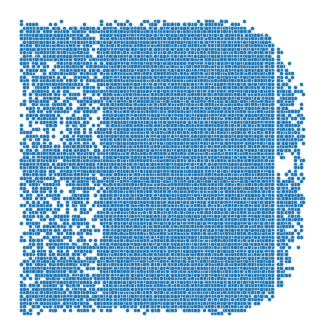

In [19]:
shot_chart = sns.relplot(data=shot_info_rename, x='xCord', y='yCord', kind='scatter', s=15)
shot_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shot_chart.despine(left=True, bottom=True)


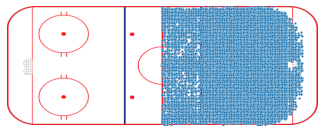

In [20]:
# This resembles a shot distribution nomralised to one side of the ice rink. Adding the ice-rink visual to make better sense of the shot distribution.

shot_chart = sns.relplot(data=shot_info_rename, x='xCord', y='yCord', kind='scatter', s=5)
shot_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shot_chart.despine(left=True, bottom=True)
for ax in shot_chart.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])

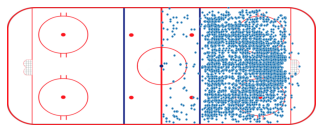

In [21]:
# It is difficult to make sense of the data with this visualisation as we are mapping c. 120,000 shots to a limited area. 
# Accordingly, almost all possible x and y coordinate pairs will be visualised
# In order to make sense of the data, I will cut the shot sample size down to the first 3,500 shots from the shot_info_rename dataframe

shot_info_reduced = shot_info_rename.iloc[0:3501, :]

shot_chart_reduced = sns.relplot(data=shot_info_reduced, x='xCord', y='yCord', kind='scatter', s=5)
shot_chart_reduced.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shot_chart_reduced.despine(left=True, bottom=True)
for ax in shot_chart_reduced.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])


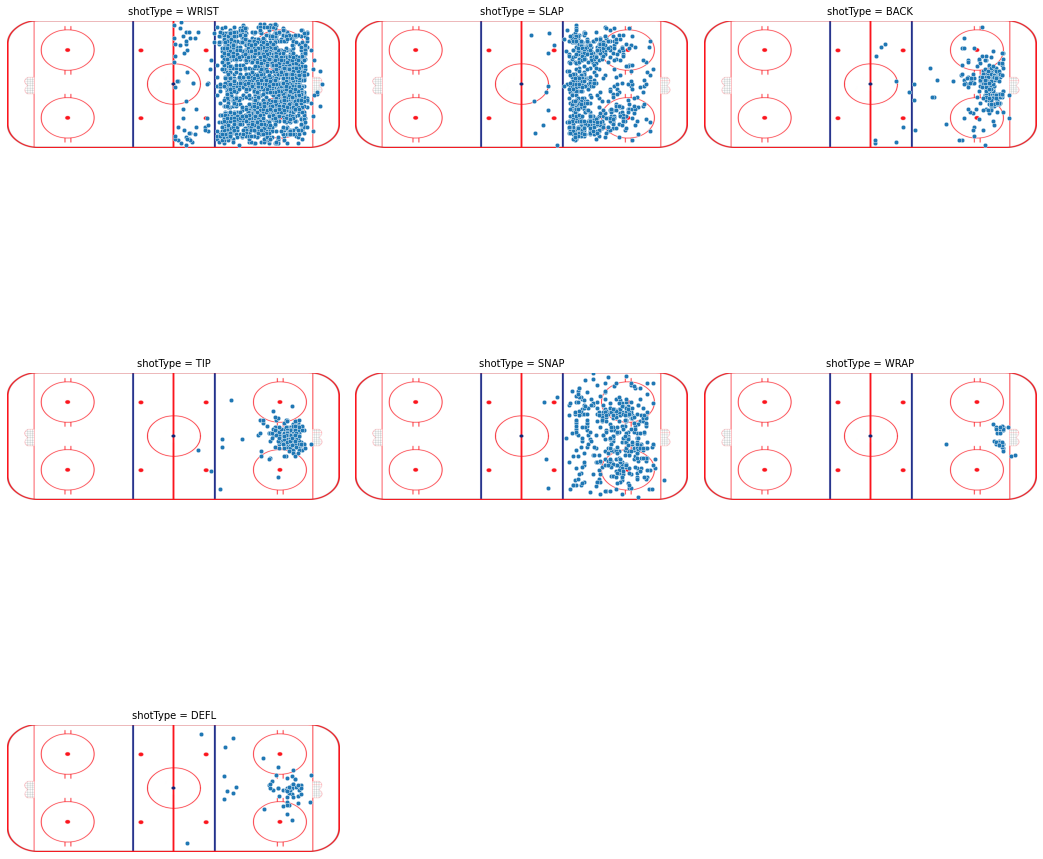

In [22]:
# We can see how each shot types are concentrated by position in the rink.

# Wrist shots are the most common shot type and players will attempt them from all parts of the rink.
# Slap shots tend to be taken from closer to the blue line.
# Backhand shots are typically taken much closer to the net as they do not have as much power as wrist or slap shots.
# Tipped shots are clustered between the faceoff circles right infront of the gaol mouth (the area known as "the slot").
# Snap shots - like wrist shots - are taken from all parts of the ice, but at a much lower frequency than wrist shots.
# Wraparound shots take place right in front of the goal. Due to the nature of this shot type - where the player skates the puck behind the net before "wrapping around" it to shoot - any Wraparound shots located beyond the area immediately in front of the goal are likely cases of misclassification by the official scorer.


shotType_chart = sns.relplot(data=shot_info_reduced,col = 'shotType',col_wrap=3, x='xCord', y='yCord', kind='scatter', s=20)
shotType_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shotType_chart.despine(left=True, bottom=True)
for ax in shotType_chart.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])

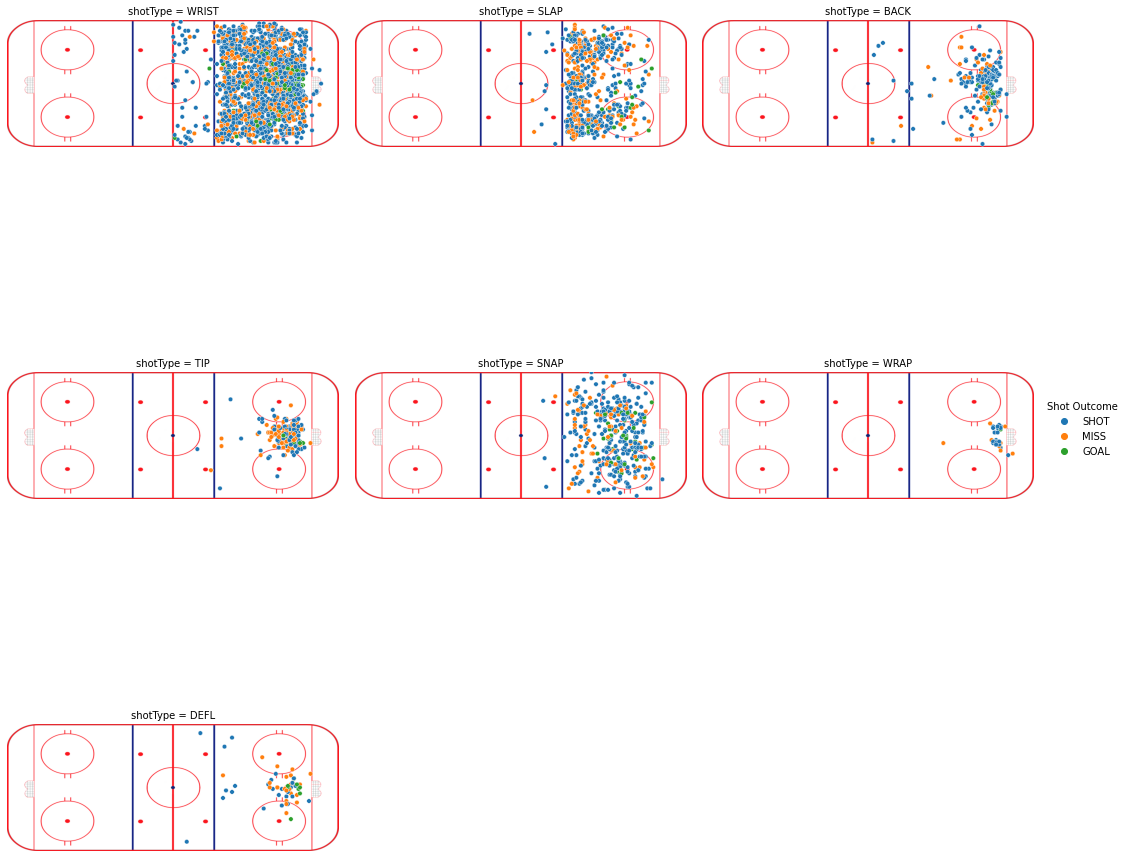

In [23]:
# Visualising the shot data by Shot Outcome - either a shot on goal, a miss or a goal

shotType_chart = sns.relplot(data=shot_info_reduced,col = 'shotType',hue='Shot Outcome' , col_wrap=3, x='xCord', y='yCord', kind='scatter', s=20)
shotType_chart.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
shotType_chart.despine(left=True, bottom=True)
for ax in shotType_chart.fig.axes:
    ax.imshow(rink_img, zorder=0, extent=[-110, 110, -42, 42])

In [24]:
shot_info.head()

,shotDistance,xCordAdjusted,yCordAdjusted,shotType,event,playerPositionThatDidEvent
shotID,,,,,,
0,42.520583,61,-32,WRIST,SHOT,C
1,30.610456,65,-19,WRIST,SHOT,L
2,85.381497,8,27,WRIST,SHOT,D
3,29.274562,60,4,WRIST,SHOT,L
4,26.305893,63,4,WRIST,SHOT,L


In [25]:
# In order to run a model, I will need:
# a single boolean column to distinguish shots that are goals from all other shots.
# the shotDistance
# the square of the shotDistance
# shotType


shot_info['Goal'] = shot_info['event'] == 'GOAL' # creating the goal column 
shot_info['Goal'] = shot_info['Goal'].astype(int) # converting Goal column to an integer to allow it to act as the dummy variable for use in model
shot_info['shotDistance_sq'] = shot_info['shotDistance']**2 # creating column for square of shot distance
shot_info.drop('xCordAdjusted', axis=1, inplace=True) # dropping unnecessary column
shot_info.drop('yCordAdjusted', axis=1, inplace=True) # dropping unnecessary column
shot_info.drop('playerPositionThatDidEvent', axis=1, inplace=True) # dropping unnecessary column
shot_info.head()


<ipython-input-25-b79b06971c4b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_info['Goal'] = shot_info['event'] == 'GOAL' # creating the goal column
<ipython-input-25-b79b06971c4b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_info['Goal'] = shot_info['Goal'].astype(int) # converting Goal column to an integer to allow it to act as the dummy variable for use in model
<ipython-input-25-b79b06971c4b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,shotDistance,shotType,event,Goal,shotDistance_sq
shotID,,,,,
0,42.520583,WRIST,SHOT,0,1808.0
1,30.610456,WRIST,SHOT,0,937.0
2,85.381497,WRIST,SHOT,0,7290.0
3,29.274562,WRIST,SHOT,0,857.0
4,26.305893,WRIST,SHOT,0,692.0


In [26]:
# Filtering for all shotIDs that resulted in a Goal to check function. The value for 'Goal' is 1 where the value for 'event' is GOAL/
shot_info.loc[shot_info['event'] == 'GOAL']


,shotDistance,shotType,event,Goal,shotDistance_sq
shotID,,,,,
27,17.492856,SNAP,GOAL,1,306.0
32,17.117243,WRIST,GOAL,1,293.0
70,47.010637,WRIST,GOAL,1,2210.0
76,14.035669,TIP,GOAL,1,197.0
77,29.529646,WRIST,GOAL,1,872.0
...,...,...,...,...,...
121370,39.623226,WRIST,GOAL,1,1570.0
121385,30.675723,WRIST,GOAL,1,941.0
4,10.049876,WRIST,GOAL,1,101.0


In [27]:
model = smf.ols(formula='Goal ~ shotDistance + shotDistance_sq', data=shot_info)

In [28]:
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.030     
Dependent Variable: Goal             AIC:                11702.2765
Date:               2022-11-17 02:41 BIC:                11731.3988
No. Observations:   121471           Log-Likelihood:     -5848.1   
Df Model:           2                F-statistic:        1887.     
Df Residuals:       121468           Prob (F-statistic): 0.00      
R-squared:          0.030            Scale:              0.064469  
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           0.1927   0.0024  79.4068 0.0000  0.1880  0.1975
shotDistance       -0.0056   0.0001 -39.4249 0.0000 -0.0059 -0.0053
shotDistance_sq     0.0000   0.0000  24.7984 0.0000  0.0000  0.0000
-------------------------------------------------------------------
Omnibus:             76797.227     Durbin-Watson:        2.012     
Prob(Omnibus):       0.000         Jarque-Bera (JB):     569874.326
Skew:                3.171         Prob(JB):             0.000     
Kurtosis:            11.507        Condition No.:        6874      
===================================================================
* The condition number is large (7e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [29]:
# shotDistance_sq value is rounded too low to see - so I will display it via results.params
results.params

Intercept          0.192728
shotDistance      -0.005583
shotDistance_sq    0.000045
dtype: float64

In [30]:
# Defining a function to predict the probability of a goal using the information from model fitting

def prob_of_goal(shotDistance):
    b0, b1, b2 = results.params
    return (b0 + b1*shotDistance + b2*(shotDistance**2)) # I am squaring the shot distance as the effect of distance is not expected to equal across all cases. Moving shot distance from 1ft from the goal to 5ft is expected to reduce the probability of scoring more than moving from 35ft to 40ft.

In [31]:
prob_of_goal(5)

0.16593608151603767

In [32]:
prob_of_goal(10)

0.14138543248295282

In [33]:
prob_of_goal(20)

0.09900913586545479

In [34]:
# predicting the results for all shots in shot_info and comparing to the actual recorded outcome

shot_info['Goal_hat'] = results.predict(shot_info)

<ipython-input-34-29f6649856d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_info['Goal_hat'] = results.predict(shot_info)


In [35]:
# Displaying calculated probability against the recorded outcome for a random sample of 25 shots in shot_info

shot_info[['Goal', 'Goal_hat']].sample(25)

,Goal,Goal_hat
shotID,,
9861,0,0.069002
56613,0,0.127561
46028,0,0.038171
92267,0,0.021912
41942,0,0.081117
119382,0,0.023307
99363,0,0.123205
37554,0,0.042380
62334,0,0.072618


In [36]:
# Logistic Regression



In [37]:
shot_info.head()

,shotDistance,shotType,event,Goal,shotDistance_sq,Goal_hat
shotID,,,,,,
0,42.520583,WRIST,SHOT,0,1808.0,0.036410
1,30.610456,WRIST,SHOT,0,937.0,0.063850
2,85.381497,WRIST,SHOT,0,7290.0,0.042910
3,29.274562,WRIST,SHOT,0,857.0,0.067722
4,26.305893,WRIST,SHOT,0,692.0,0.076897


In [38]:
# dropping the Goal_hat column from our linear regression
shot_info.drop('Goal_hat', axis=1, inplace=True)
shot_info.head()

C:\Users\zomgj\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,shotDistance,shotType,event,Goal,shotDistance_sq
shotID,,,,,
0,42.520583,WRIST,SHOT,0,1808.0
1,30.610456,WRIST,SHOT,0,937.0
2,85.381497,WRIST,SHOT,0,7290.0
3,29.274562,WRIST,SHOT,0,857.0
4,26.305893,WRIST,SHOT,0,692.0


In [39]:
model_logistic = smf.logit(formula='Goal ~ shotDistance', data=shot_info)

In [40]:
results_logistic = model_logistic.fit()
results_logistic.summary2()

Optimization terminated successfully.
         Current function value: 0.243553
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.055     
Dependent Variable: Goal             AIC:              59173.2501
Date:               2022-11-17 02:41 BIC:              59192.6649
No. Observations:   121471           Log-Likelihood:   -29585.   
Df Model:           1                LL-Null:          -31309.   
Df Residuals:       121469           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -1.4227   0.0211 -67.4470 0.0000 -1.4640 -1.3813
shotDistance     -0.0406   0.0008 -53.4524 0.0000 -0.0420 -0.0391
=================================================================

"""

In [41]:
results_logistic.params

Intercept      -1.422681
shotDistance   -0.040562
dtype: float64

In [42]:
# Defining a function to predict the probability of a goal using the information from model fitting

def prob_goal_logistic(shotDistance):
    b0, b1 = results_logistic.params
    value = (b0 + b1*shotDistance)
    return 1/(1 + math.exp(-value))

In [43]:
prob_goal_logistic(5)

0.16444884943935284

In [44]:
prob_goal_logistic(15)

0.11597467076851235

In [45]:
prob_goal_logistic(40)

0.04542651411383013

In [46]:
# predicting the results for all shots in shot_info and comparing to the actual recorded outcome

shot_info['Goal_hat_logistic'] = results_logistic.predict(shot_info)

<ipython-input-46-641218d55dce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_info['Goal_hat_logistic'] = results_logistic.predict(shot_info)


In [47]:
# Displaying calculated probability against the recorded outcome for a random sample of 25 shots in shot_info

shot_info[['Goal', 'Goal_hat_logistic']].sample(25)

,Goal,Goal_hat_logistic
shotID,,
77904,0,0.045339
7610,0,0.057583
8904,0,0.061728
72428,0,0.047312
49670,0,0.031659
106136,0,0.068890
107712,1,0.074564
72217,0,0.052278
107644,0,0.030769


In [48]:
# Random Forest

In [49]:
#
# continuous variables: shot distance, shot coordinates, shot angle, the amount of time the shooter was on the ice without rest before they took the shot
# categorical variables: was the shot off the rush, did the shot generate a rebound, shooter position, shooter handedness, was the shooter on their off wing

In [50]:
shots_df.head()

,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,awaySkatersOnIce,...,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
shotID,,,,,,,,,,,,,,,,,,,,,
0,42.520583,61.0,61.0,-32.0,32.0,-8.4,0,0,0,5,...,61,0.202514,0.009192,0.445979,0.289830,0.023891,0.028594,0.718082,-32,-32
1,30.610456,-65.0,65.0,19.0,19.0,21.4,0,0,0,5,...,65,0.285948,0.031353,0.303080,0.325607,0.026384,0.027629,0.793188,19,-19
2,85.381497,-8.0,8.0,-27.0,27.0,3.8,0,0,0,5,...,8,0.161225,0.012753,0.307661,0.486296,0.019218,0.012846,0.840122,-27,27
3,29.274562,-60.0,60.0,-4.0,4.0,0.0,0,0,0,5,...,60,0.161623,0.121753,0.374061,0.264891,0.024508,0.053163,0.729294,-4,4
4,26.305893,63.0,63.0,4.0,4.0,0.0,0,0,0,5,...,63,0.116379,0.088392,0.432747,0.284554,0.018850,0.059078,0.695010,4,4


In [51]:
# establishing my continuous variables from shots_df
cont_vars = ['shotDistance', 'xCordAdjusted', 'yCordAdjusted', 'shotAngleAdjusted', 'shooterTimeOnIceSinceFaceoff']

In [52]:
#establishing my categorical variables from shots_df
cat_vars = ['shotGeneratedRebound', 'shotRush', 'playerPositionThatDidEvent', 'shooterLeftRight', 'offWing']

In [53]:

df_cat = pd.concat([pd.get_dummies(shots_df[x]) for x in cat_vars], axis = 1)
df_cat.head(25)

,0,1,0,1,C,D,G,L,R,L,R,0,1
shotID,,,,,,,,,,,,,
0,1,0,1,0,1,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,0,1,0,1,0,0,1
2,1,0,1,0,0,1,0,0,0,0,1,0,1
3,1,0,1,0,0,0,0,1,0,1,0,1,0
4,1,0,1,0,0,0,0,1,0,1,0,1,0
5,1,0,1,0,0,1,0,0,0,0,1,0,1
6,1,0,1,0,1,0,0,0,0,1,0,1,0
7,1,0,1,0,0,1,0,0,0,1,0,1,0
8,1,0,0,1,0,0,0,0,1,0,1,0,1


In [54]:
df_combined = pd.concat([shots_df[cont_vars], df_cat], axis = 1)
df_combined['shotType'] = shots_df['shotType']
df_combined.sample(15)

,shotDistance,xCordAdjusted,yCordAdjusted,shotAngleAdjusted,shooterTimeOnIceSinceFaceoff,0,1,0,1,C,D,G,L,R,L,R,0,1,shotType
shotID,,,,,,,,,,,,,,,,,,,
64411,8.062258,81,-1,7.125016,52,1,0,1,0,0,0,0,1,0,1,0,0,1,DEFL
16039,50.447993,40,-12,13.760785,25,1,0,1,0,0,1,0,0,0,0,1,1,0,WRIST
35811,52.345009,51,-36,43.451842,20,1,0,1,0,1,0,0,0,0,1,0,0,1,WRIST
5864,35.000000,61,21,36.869898,14,1,0,1,0,1,0,0,0,0,1,0,1,0,WRIST
982,11.313708,81,-8,45.000000,28,1,0,1,0,1,0,0,0,0,1,0,0,1,BACK
35718,29.529646,75,26,61.699244,6,1,0,1,0,0,0,0,0,1,1,0,1,0,WRIST
55550,19.104973,75,13,42.878904,85,1,0,1,0,1,0,0,0,0,0,1,0,1,WRIST
77333,57.245087,38,-26,27.012665,24,1,0,1,0,0,1,0,0,0,0,1,1,0,SNAP
95476,14.866069,79,-11,47.726311,9,1,0,1,0,1,0,0,0,0,0,1,1,0,WRIST


In [55]:
# we know there are null values for shotType as seen earlier in this notebook
null_values = df_combined.isnull().sum()
null_values.head(19)

shotDistance                    0
xCordAdjusted                   0
yCordAdjusted                   0
shotAngleAdjusted               0
shooterTimeOnIceSinceFaceoff    0
0                               0
1                               0
0                               0
1                               0
C                               0
D                               0
G                               0
L                               0
R                               0
L                               0
R                               0
0                               0
1                               0
shotType                        5
dtype: int64

In [56]:
# Dropping null values
df_combined.dropna(inplace=True)

In [57]:
# setting up variables. The x variables (i.e. continuos and categorical) will predict the y variable (shot type)
yvar = 'shotType'
xvars = cont_vars + list(df_cat.columns)

In [58]:
# Training the model
# Holdout set is

train, test = skms.train_test_split(df_combined, test_size=0.33)

In [59]:
forest_model = sken.RandomForestClassifier(n_estimators=100)
forest_model.fit(train[xvars], train[yvar])

RandomForestClassifier()

In [60]:
# let's test

test['shotType_hat'] = forest_model.predict(test[xvars])

<ipython-input-60-e3174282e624>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['shotType_hat'] = forest_model.predict(test[xvars])


In [61]:
test ['correct'] = (test['shotType_hat']) == test['shotType']

<ipython-input-61-b47cc7845dc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test ['correct'] = (test['shotType_hat']) == test['shotType']


In [62]:
test['correct'].mean()

0.4640255463526594

In [63]:
Prob_table = pd.DataFrame(forest_model.predict_proba(test[xvars]),
index=test.index,
columns=forest_model.classes_)
Prob_table.head(10)

,BACK,DEFL,SLAP,SNAP,TIP,WRAP,WRIST
shotID,,,,,,,
101684,0.02,0.01,0.000,0.698333,0.00,0.0,0.271667
33162,0.00,0.00,0.030,0.130000,0.00,0.0,0.840000
36176,0.00,0.00,0.215,0.090000,0.00,0.0,0.695000
47457,0.00,0.00,0.225,0.480000,0.00,0.0,0.295000
86382,0.00,0.00,0.600,0.157500,0.00,0.0,0.242500
46710,0.00,0.00,0.500,0.130000,0.00,0.0,0.370000
8897,0.00,0.00,0.000,0.600000,0.00,0.0,0.400000
95163,0.00,0.04,0.030,0.107500,0.30,0.0,0.522500
104621,0.01,0.23,0.020,0.030000,0.00,0.0,0.710000


In [64]:
Prob_results = pd.concat([test[['shotType','shotType_hat','correct']],Prob_table], axis=1)
Prob_results.head(10)

,shotType,shotType_hat,correct,BACK,DEFL,SLAP,SNAP,TIP,WRAP,WRIST
shotID,,,,,,,,,,
101684,BACK,SNAP,False,0.02,0.01,0.000,0.698333,0.00,0.0,0.271667
33162,WRIST,WRIST,True,0.00,0.00,0.030,0.130000,0.00,0.0,0.840000
36176,WRIST,WRIST,True,0.00,0.00,0.215,0.090000,0.00,0.0,0.695000
47457,SLAP,SNAP,False,0.00,0.00,0.225,0.480000,0.00,0.0,0.295000
86382,WRIST,SLAP,False,0.00,0.00,0.600,0.157500,0.00,0.0,0.242500
46710,WRIST,SLAP,False,0.00,0.00,0.500,0.130000,0.00,0.0,0.370000
8897,WRIST,SNAP,False,0.00,0.00,0.000,0.600000,0.00,0.0,0.400000
95163,BACK,WRIST,False,0.00,0.04,0.030,0.107500,0.30,0.0,0.522500
104621,SLAP,WRIST,False,0.01,0.23,0.020,0.030000,0.00,0.0,0.710000


In [65]:
Prob_results.groupby('shotType')[['correct', 'WRIST','SNAP','SLAP','BACK','DEFL','TIP','WRAP']].mean().round(2)

,correct,WRIST,SNAP,SLAP,BACK,DEFL,TIP,WRAP
shotType,,,,,,,,
BACK,0.16,0.47,0.09,0.04,0.18,0.05,0.14,0.02
DEFL,0.06,0.46,0.10,0.03,0.14,0.07,0.20,0.01
SLAP,0.25,0.54,0.14,0.28,0.02,0.01,0.01,0.00
SNAP,0.09,0.58,0.16,0.14,0.05,0.02,0.05,0.00
TIP,0.22,0.44,0.08,0.02,0.15,0.07,0.23,0.01
WRAP,0.22,0.40,0.04,0.01,0.20,0.03,0.11,0.21
WRIST,0.69,0.58,0.14,0.13,0.07,0.02,0.06,0.01


In [66]:
# Cross Validation

forest_model_CV = sken.RandomForestClassifier(n_estimators=100)
fmcv_scores = skms.cross_val_score(forest_model_CV, train[xvars], train[yvar], cv=10)
fmcv_scores.mean()

0.473642705473354